# Neural networks, better on a RBG or Gray images of the same dataset ?

Authot : ALIMOUSSA Mohamed

I had this question before, what if we transforme our RGB dataset to gray, then apply a Neurone network model on it ? are we gonna have the same result ? better ? less ? and how much diffrence between the 2 accuracies.
knowing that if we work with only gray images we will be reducing so much complexcity and reducing also the time of calculations. In fact, instead of working with 3 grids; R,G and B we will be working with a single one.

After we flatten the list of images, the shape of the RGB dataset will be : [Number_of_images,width,height,3] where the gray dataset will be a : [Number_of_images,width,height]

To answer our question we will have to get a gray dataset from the RGB existed one. To do that there 2 methodes, depending;

    The firts one will be creating a new dataset, called gray_dataset for example, from the existed one. for this opereration we will be doing an offline calculations.

    The seconde one will be transforming images to gray scale in the time of calculation which is an online operation.

for our case we will use the first methode; which is the offline operation, in fact, we will define a function that will take as input the directory of our dataset, and generate a new one called gray_dataset.

First step, let's import the needed libraries and get that out of the way.

In [39]:
import tensorflow as tf
from skimage import data
import matplotlib.pyplot as plt
import os
import random
from skimage import transform
import numpy as np
from PIL import Image

# What dataset to use ? 

I have choses to work with the TSD databes since we have already dealed with it in class.

The German Traffic Sign Dataset consists of 39,209 color images that we are supposed to use for training, and 12,630 images that we will use for testing. Each image is a photo of a traffic sign belonging to one of 62 classes, e.g. traffic sign types.

<img src="photo/a.png"></img>

Each image is a array of pixel intensities, represented as [0, 255] integer values in RGB color space. Class of each image is encoded as an integer in a 0 to 42 range. Let’s check if the training dataset is balanced across classes.

<img src="photo/b.png"></img>

Apparently dataset is very unbalanced, and some classes are represented significantly better than the others. Let’s now plot a bunch of random images for various classes to see what we are working with.

<img src="photo/yield.png"></img>
  <center>Yiel</center>
<img src="photo/noentry.png"></img>
<center>No entry</center>
<img src="photo/gen.png"></img>
<center>General caution</center>
<img src="photo/round.png"></img>
<center>Roundabout mandatory</center>

The images differ significantly in terms of contrast and brightness, so we will need to apply some kind of histogram equalization, this should noticeably improve feature extraction.

We will go to http://btsd.ethz.ch/shareddata/ and download the training and test data. There is a lot of datasets on that page, but you only need the two files listed under BelgiumTS for Classification (cropped images)":

    BelgiumTSC_Training (171.3MBytes)
    BelgiumTSC_Testing (76.5MBytes)
    
After downloading and expanding the files, your directory structure should look something like this:

/traffic/datasets/BelgiumTS/Training/
/traffic/datasets/BelgiumTS/Testing/   

Each of the two directories above has 62 sub-directories named sequentially from 00000 to 00062. The directory name represents the code (or label) and the images inside the directory are examples of that label. 

The Training directory contains sub-directories with sequental numerical names from 00000 to 00061. The name of the directory represents the labels from 0 to 61, and the images in each directory represent the traffic signs that belong to that label. The images are saved in the not-so-common .ppm format, but luckily, this format is supported in the skimage library.

# Offline operation : Create dataset of gray scale images 


this function is the one responsible for creating our gray database, with training or testing folder as input, this function is able to create an other folder training_gray or testing_gray containing all the same sub directories of the 2 folders with images in gray scale. Note that we won't need to move our CSV file that contains the labels and the informations about the images, since the labels won't change.




In [ ]:
os.makedirs(os.path.dirname("/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Testing_gray"))
os.makedirs(os.path.dirname("/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Training_gray"))

In [41]:
def to_gray(data_dir):
    
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir)
                   if os.path.isdir(os.path.join(data_dir, d))]
    i=0
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir)
                      if f.endswith(".ppm")]
        label_dir_gray = data_dir+'_gray/'+d
        if not os.path.exists(label_dir_gray):
               os.makedirs(label_dir_gray)
        
        for f in file_names:
            img = Image.open(f).convert('LA')
            name = label_dir_gray+'/'+str(i)+'.png'
            img.save(name)
            i = i + 1            
               
to_gray("/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Testing")
to_gray("/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Training")

# Load data 

The load_data function takes all images from each sub directory and turn them to a list, for each sub directory the function stockes the label (number of images in sub folder) time, so each image will have the corresponding label. the function uses OS library whish is a directory and files manager.

In [60]:
# Definition of function to load images from folders to tables and to build a table of names of images file as class
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir)
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f)
                      for f in os.listdir(label_dir)
                      if (f.endswith(".ppm") or f.endswith(".png"))]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

# For RGB IMAGES

In [61]:
directory_data = "/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Training"
train_images,train_labels = load_data(directory_data)

directory_data = "/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Testing"
test_images,test_labels = load_data(directory_data)

# FOR GRAY SCALE IMAGES

In [62]:
directory_data = "/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Training_gray"
train_images_gray,train_labels_gray = load_data(directory_data)

directory_data = "/home/mohamed/Documents/Others/deep_learning/seconde _lab/data/Testing_gray"
test_images_gray,test_labels_gray = load_data(directory_data)

Here we're loading two lists:
* **images** a list of images, each image is represted by a numpy array.
* **labels** a list of labels. Integers with values between 0 and 61.


It's not usually a good idea to load the whole dataset into memory, but this dataset is small and we're trying to keep the code simple, so it's okay for now. We'll improve it in the next part. For larger datasets, we'd want to have a separate thread loading chunks of data in the background and feeding them to the training thread. 

# Explore the Dataset :

How many images and labels do we have?

In [63]:
print("For training data :")
print("*****RGB******")
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(train_labels)), len(train_images)))



print("For Testing data :")
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(test_labels)), len(test_images)))



print("*****GRAY*****")
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(train_labels_gray)), len(train_images_gray)))



print("For Testing data :")
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(test_labels_gray)), len(test_images_gray)))


For training data :
*****RGB******
Unique Labels: 62
Total Images: 4575
For Testing data :
Unique Labels: 53
Total Images: 2520
*****GRAY*****
Unique Labels: 62
Total Images: 4575
For Testing data :
Unique Labels: 53
Total Images: 2520


In [117]:
def display_images_and_labels(images, labels,op):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        if(op==0):
            _ = plt.imshow(image,cmap='gray')
        else:
            _ = plt.imshow(image)

    plt.show()



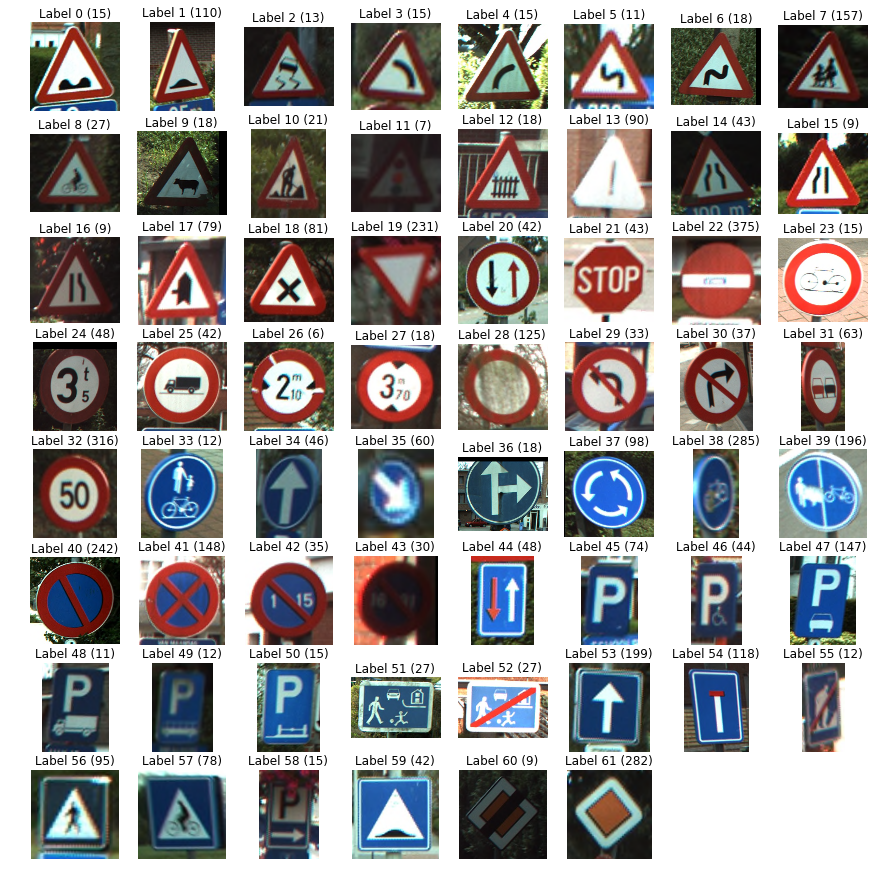

In [57]:
display_images_and_labels(train_images[:], train_labels[:],)

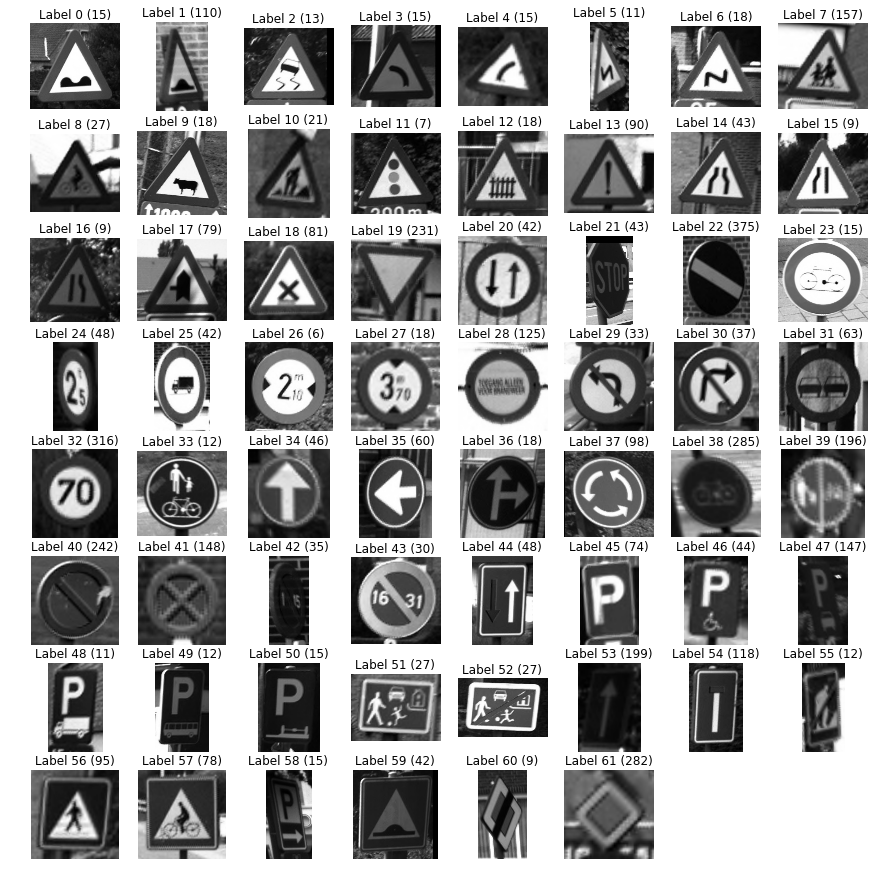

In [118]:
display_images_and_labels(train_images_gray, train_labels_gray,0)

  
## Handling images of different sizes?

Most neural networks expect a fixed-size input, and our network is no exception. But as we've seen above, our images are not all the same size. A common approach is to crop and pad the images to a selected apect ratio, but then we have to make sure that we don't cut-off parts of the traffic signs in the process. That seems like it might require manual work! Let's do a simpler solution instead (a hack really): We'll just resize the images to a fixed size and ignore the distortions caused by the different aspect ratios. A person can easily recognize a traffic sign even if it's compressed or stretched a bit, so we hope that our model can as well.

And while we're at it, let's make the images smaller. The larger the input data, the larger the model, and the slower it is to train. In the early stages of development we want fast training to avoid long waits between iterations while we change the code rapidly.

What are the sizes of our image anyway?

In [42]:
for image in train_images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (109, 107, 3), min: 13, max: 255
shape: (120, 118, 3), min: 11, max: 255
shape: (207, 155, 3), min: 5, max: 255
shape: (98, 96, 3), min: 14, max: 255
shape: (97, 85, 3), min: 14, max: 255


The sizes seem to hover around 128x128. If we resize them to, say 40x40, we'll have reduced the data and the model size and it is probably still big enough to recognize the signs, so let's go with that. 

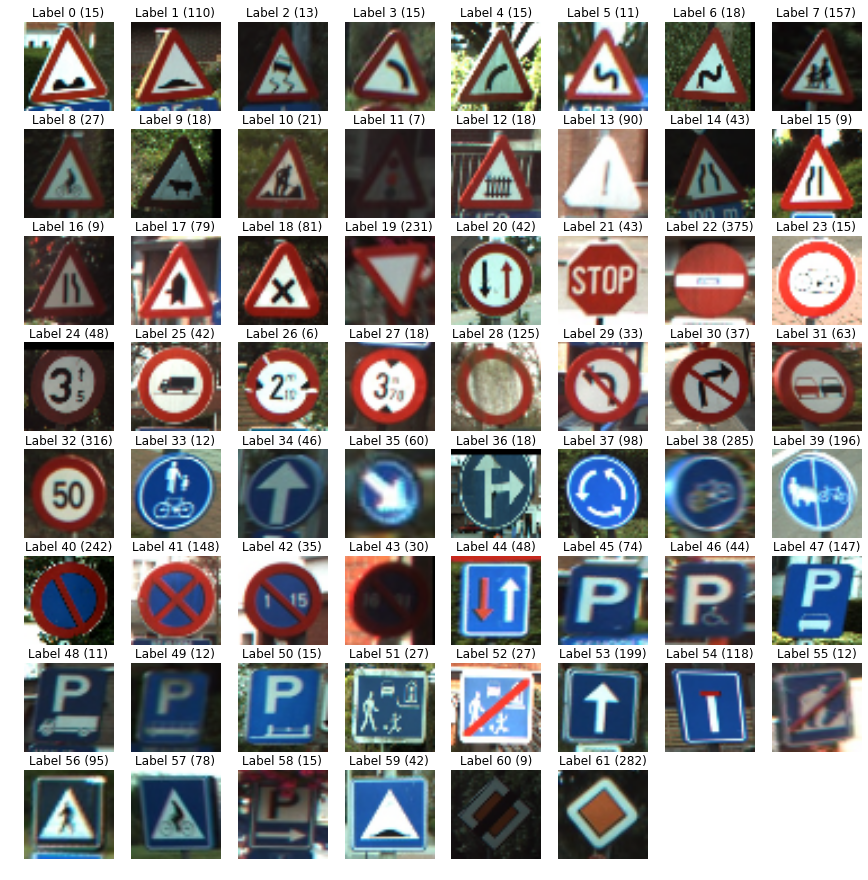

In [26]:
train_images40 = [transform.resize(image, (40, 40))
                for image in train_images]
test_images40 = [transform.resize(image, (40, 40))
                for image in test_images]

In [66]:
train_images_gray40 = [transform.resize(image, (40, 40))
                for image in train_images_gray]
test_images_gray40 = [transform.resize(image, (40, 40))
                for image in test_images_gray]

# CNN MODEL

## ONE HIDDEN LAYER MODEL :

In [43]:
def create_cnn_model1(input_data):
        images_flat = tf.contrib.layers.flatten(input_data)
        logite = tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)
        return logite


## ALEXNET CNN MODEL

 Three steps to create a CNN
 1. Convolution
 2. Activation
 3. Pooling
 Repeat Steps 1,2,3 for adding more hidden layers
 4. After that make a fully connected network
 This fully connected network gives ability to the CNN to classify the samples

for ALEXNET CNN Model we will be using this architecture : 

Architecture:   CONV1 -> MAXPOOL1 -> NORM1 -> CONV2 -> MAXPOOL2 -> NORM2 -> CONV3 -> CONV4 -> CONV5 -> MaxPOOL3
                -> FC6 -> FC7 -> FC8

In [ ]:
def alexnet_cnn(input_data):
        conv1 = tf.layers.conv2d(inputs=input_data,filters=32,kernel_size=[5,5],padding="same",activation=tf.nn.relu)
        lrn1 = tf.nn.local_response_normalization(conv1,
                                              alpha=1e-4,
                                              beta=0.75,
                                              depth_radius=2,bias=2.0)
        pool1 = tf.layers.max_pooling2d(inputs=lrn1,pool_size=[2,2],strides=2)
        
        # 2nd Layer: Conv (w ReLu)  -> Lrn -> Pool with 2 groups
        conv1 = tf.layers.conv2d(inputs=pool1,filters=32,kernel_size=[5,5],padding="same",activation=tf.nn.relu)
        lrn1 = tf.nn.local_response_normalization(conv1,
                                              alpha=1e-4,
                                              beta=0.75,
                                              depth_radius=2,bias=2.0)
        pool1 = tf.layers.max_pooling2d(inputs=lrn1,pool_size=[2,2],strides=2)
        
        # 3rd Layer: Conv (w ReLu)
        conv3 = conv(pool2, 3, 3, 384, 1, 1, name='conv3')

        # 4th Layer: Conv (w ReLu) splitted into two groups
        conv4 = conv(conv3, 3, 3, 384, 1, 1, groups=2, name='conv4')

        # 5th Layer: Conv (w ReLu) -> Pool splitted into two groups
        conv5 = conv(conv4, 3, 3, 256, 1, 1, groups=2, name='conv5')
        pool5 = max_pool(conv5, 3, 3, 2, 2, padding='VALID', name='pool5')

        # 6th Layer: Flatten -> FC (w ReLu) -> Dropout
        flattened = tf.reshape(pool5, [-1, 6*6*256])
        logit = create_cnn_model1(flattened)
        
        return logit

# FOR RGB IMAGES :

From now on we will be working only on RBG images dataset resized to 40x40.
      

In [44]:
train_images40[2].shape

(40, 40, 3)

In [30]:
# Create placeholders
x = tf.placeholder(tf.float32, [None, 40, 40, 3])
y = tf.placeholder(dtype = tf.int32, shape = [None])

Here we won't be creating any weight variable, in fact, __fully_connected creates a variable called weights and saves it in the session__ that we will be creating, representing a fully connected weight matrix, which is multiplied 
by the inputs to produce a Tensor of hidden units. If a normalizer_fn is provided (such as batch_norm), it is 
then applied. Otherwise, if normalizer_fn is None and a biases_initializer is provided then a biases variable would
be created and added the hidden units. Finally, if activation_fn is not None, it is applied to the hidden units as
well.


In [45]:
    # Call the model function : we can chose either onehiddenlayer model or alexnet model
    logits = create_cnn_model1(x)
    #logits = alexney_cnn(x)
     
    #define loss and optimizer
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))
    train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss) 
    
    ''' logits will be a vector of 62 element containing a kind of probability the class that have the biggest number
    of the 62 numbers (result of multiplication of weight matrises and input) we be the right class of our input
    we have to get then, the index of the max value of the 62 element of logits that index will be the predected class 
    of our model'''
    
    correct_pred = tf.argmax(logits, 1)

## Training phase 

In [32]:
# Create a session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Training with n (here I gave n=100) epoch, we should give a large number, but don't forget more means more time to wait 

for i in range(1001):
        _,loss_value = sess.run([train_op,loss], feed_dict={x: train_images40, y:train_labels})
        if i % 100 == 0:
            print("EPOCH "+str(i)+"        Loss: "+str(loss_value))


EPOCH 0        Loss: 4.21522
EPOCH 100        Loss: 1.37131
EPOCH 200        Loss: 1.20416
EPOCH 300        Loss: 1.13114
EPOCH 400        Loss: 1.08983
EPOCH 500        Loss: 1.06353
EPOCH 600        Loss: 1.04556
EPOCH 700        Loss: 1.03266
EPOCH 800        Loss: 1.02307
EPOCH 900        Loss: 1.01574
EPOCH 1000        Loss: 1.01002


In [33]:
# Pick 10 random images
sample_indexes = random.sample(range(len(test_images40)), 10)
sample_images = [test_images40[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
print(sample_labels)
print(predicted)

[32, 32, 40, 32, 41, 18, 39, 29, 28, 32]
[32 32 40 32 41 18 39 40 28 32]


## Test phase

In [34]:
predicted = sess.run([correct_pred], feed_dict={x: test_images40})[0]

accuracy = tf.reduce_sum(tf.cast(tf.equal(correct_pred,test_labels),tf.float32))

print("The accuracy of our model is : "+ str(100*(sess.run(accuracy,feed_dict={x: test_images40})/len(test_labels)))[0:6]+" %")

The accuracy of our model is : 72.222 %


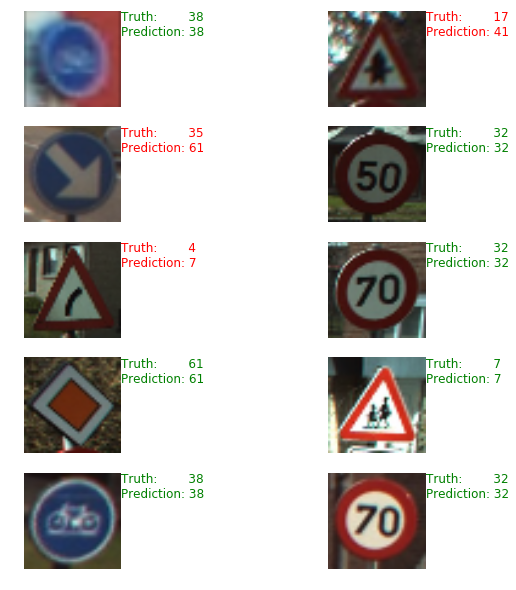

In [35]:
# Display the predictions and the ground truth visually.


random_indexes = random.sample(range(len(test_images40)), 10)
image_samples = [test_images40[i] for i in random_indexes]
label_samples = [test_labels[i] for i in random_indexes]

predictions  = sess.run([correct_pred], feed_dict={x: image_samples})[0]


fig = plt.figure(figsize=(10, 10))
for i in range(len(image_samples)):
    true_predection = label_samples[i]
    prediction = predictions[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if true_predection == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(true_predection, prediction), 
             fontsize=12, color=color)
    plt.imshow(image_samples[i])

## FOR GRAY SCALE IMAGES :

In [109]:
train_images_gray40[2].shape

(40, 40)

In [104]:
# Create placeholders
x_gray = tf.placeholder(tf.float32, [None, 40, 40],name="allerz")
y_gray = tf.placeholder(dtype = tf.int32, shape = [None],name="aller")

In [105]:
    # Call the model function : we can chose either onehiddenlayer model or alexnet model
    logits_gray = create_cnn_model1(x_gray)
    #logits = alexney_cnn(x)
     
    #define loss and optimizer
    loss_gray = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y_gray, logits = logits_gray))
    train_op_gray = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_gray) 
    
    correct_pred_gray = tf.argmax(logits_gray, 1)
    

In [106]:
# we need to create a new session that will hold our new weights 
init2 = tf.initialize_all_variables()

sess_g = tf.Session()
sess_g.run(init2)
sess_g.run(tf.global_variables_initializer())

# Training with n (here I gave n=100) epoch, we should give a large number, but don't forget more means more time to wait 

for i in range(1001):
        _,loss_value = sess_g.run([train_op_gray,loss_gray], feed_dict={x_gray: train_images_gray40, y_gray:train_labels})
        if i % 100 == 0:
            print("EPOCH "+str(i)+"        Loss: "+str(loss_value))


EPOCH 0        Loss: 4.13427
EPOCH 100        Loss: 1.79909
EPOCH 200        Loss: 1.50519
EPOCH 300        Loss: 1.36369
EPOCH 400        Loss: 1.2776
EPOCH 500        Loss: 1.21837
EPOCH 600        Loss: 1.17447
EPOCH 700        Loss: 1.14029
EPOCH 800        Loss: 1.1126
EPOCH 900        Loss: 1.0896
EPOCH 1000        Loss: 1.07039


## Test phase

In [114]:
predicted = sess_g.run([correct_pred_gray], feed_dict={x_gray: test_images_gray40})[0]

accuracy = tf.reduce_sum(tf.cast(tf.equal(predicted,test_labels),tf.float32))

print("The accuracy of our model is : "+ str(100*(sess.run(accuracy,feed_dict={x_gray: test_images_gray40})/len(test_labels)))[0:6]+" %")

The accuracy of our model is : 71.309 %


__Note that the time of training was so much less with gray images then the RGB images__

Yet, we have got __the same accuracies__

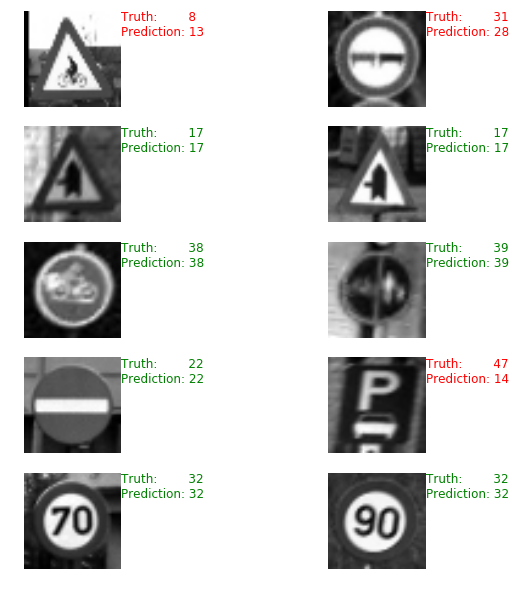

In [119]:
# Display the predictions and the ground truth visually.


random_indexes = random.sample(range(len(test_images_gray40)), 10)
image_samples = [test_images_gray40[i] for i in random_indexes]
label_samples = [test_labels[i] for i in random_indexes]

predictions  = sess_g.run([correct_pred_gray], feed_dict={x_gray: image_samples})[0]


fig = plt.figure(figsize=(10, 10))
for i in range(len(image_samples)):
    true_predection = label_samples[i]
    prediction = predictions[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if true_predection == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(true_predection, prediction), 
             fontsize=12, color=color)
    plt.imshow(image_samples[i],cmap='gray')

# CONCLUTION :

With RBG dataset we had **72.222 %** and with gray scale images we had **71.309 %** .

To answer the question asked at the very biginning, __We will have the same result wheater we worked with images as RGB or transform them to gray scale .__ I belive it is better to transform images to gray scale and work with them as a one grid istead of 3, we will not only minimise the complexity and time of training and tesing phases but also we will get the same accuracies with a small error.

Logicly since we can detect and predect the signes(images in generale) wheater it is colorful or gray, why the machine can't then ?